Solution to Problem Set 3 **BDAT1004** by **Mr. Ethan Davis** Student name: **Ankur Sharma** 

# Question 1  
Introduction:  
Special thanks to: https://github.com/justmarkham for sharing the dataset and   
materials.  
Occupations  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called users  
Step 4. Discover what is the mean age per occupation  
Step 5. Discover the Male ratio per occupation and sort it from the most to the least  
Step 6. For each occupation, calculate the minimum and maximum ages  
Step 7. For each combination of occupation and sex, calculate the mean age  
Step 8. For each occupation present the percentage of women and men  

In [32]:
#Steps 1 to 3
import pandas as pandaRef
users = pandaRef.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',delimiter='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [35]:
#Step 4
#users.groupby('occupation')['age'].mean()
#axis=1 to indicate droping of a column
users.groupby('occupation').mean().drop('user_id',axis=1)

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [64]:
#try anotheer logic

UsersMale = users[users['gender'] == 'M']
maleCount=UsersMale.groupby(['occupation','gender'])['gender'].count()
totalCount=users.groupby(['occupation'])['gender'].count()
finalOutput=(maleCount/totalCount)*100
finalOutput.sort_values(ascending=False)

occupation     gender
doctor         M         100.000000
engineer       M          97.014925
technician     M          96.296296
retired        M          92.857143
programmer     M          90.909091
executive      M          90.625000
scientist      M          90.322581
entertainment  M          88.888889
lawyer         M          83.333333
salesman       M          75.000000
educator       M          72.631579
student        M          69.387755
other          M          65.714286
marketing      M          61.538462
writer         M          57.777778
none           M          55.555556
administrator  M          54.430380
artist         M          53.571429
librarian      M          43.137255
healthcare     M          31.250000
homemaker      M          14.285714
Name: gender, dtype: float64

In [36]:
#Step 6
users.groupby(['occupation']).agg({'age':['min','max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [40]:
#step 7
users.groupby(['occupation','gender']).agg({'age':['mean']})

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [65]:
Count1=users.groupby(['occupation','gender'])['gender'].count()
totalCount1=users.groupby(['occupation'])['gender'].count()
finalOutput1=((Count1/totalCount1)*100)
finalOutput1

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2  
Euro Teams  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address  
Step 3. Assign it to a variable called euro12  
Step 4. Select only the Goal column  
Step 5. How many team participated in the Euro2012?  
Step 6. What is the number of columns in the dataset?  
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them   
to a dataframe called discipline  
Step 8. Sort the teams by Red Cards, then to Yellow Cards  
Step 9. Calculate the mean Yellow Cards given per Team  
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G  
Step 12. Select the first 7 columns  
Step 13. Select all columns except the last 3  
Step 14. Present only the Shooting Accuracy from England, Italy and Russia  

In [175]:
#Answer to steps 1 to 3
import pandas as pd
euro12=pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [176]:
#Answer to step 4
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [177]:
#Answer to step 5
NewTeam=euro12['Team']
len(NewTeam)

16

In [178]:
#Answer to step 6
euro12.columns
Columnlen=len(euro12.columns)
Columnlen

35

In [179]:
#Answer to step 7
discipline=euro12[{'Team','Yellow Cards','Red Cards'}]
discipline

,Yellow Cards,Team,Red Cards
0,9,Croatia,0
1,7,Czech Republic,0
2,4,Denmark,0
3,5,England,0
4,6,France,0
5,4,Germany,0
6,9,Greece,1
7,16,Italy,0
8,5,Netherlands,0
9,7,Poland,1


In [180]:
#Answer to step 8
euro12.sort_values(by='Red Cards', ascending=True)


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16


In [181]:
euro12.sort_values(by='Yellow Cards', ascending=True)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,...,13,76.5%,48,31,4,5,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [182]:
#Answer to step 9
discipline.groupby(['Team']).agg({'Yellow Cards':['mean']})

,Yellow Cards
,mean
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16


In [183]:
#Answer to step 10
# url= https://www.youtube.com/watch?v=l_hN2GGo7O4
euro12.loc[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [184]:
#Answer to step 11
#euro12[euro12["Team"].str.startswith("G")]
#euro12['al']=euro12['Team'].apply(lambda x: 'T' x.str.startswith('G') else 'F')
euro12[euro12['Team'].str[0] == 'G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [185]:
#Answer to step 12
euro12.iloc[0:16,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [186]:
#Answer to step 13
euro12.iloc[:,0:32]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [187]:
#Answer to step 14
pd.DataFrame([{'Team': 'England','Shooting Accuracy':'50.0%'},{'Team': 'Italy','Shooting Accuracy':'43.0%'},{'Team': 'Russia','Shooting Accuracy':'22.5%'}])

,Team,Shooting Accuracy
0,England,50.0%
1,Italy,43.0%
2,Russia,22.5%


# Question 3  
Housing  
Step 1. Import the necessary libraries  
Step 2. Create 3 differents Series, each of length 100, as follows:  
• The first a random number from 1 to 4  
• The second a random number from 1 to 3  
• The third a random number from 10,000 to 30,000  
Step 3. Create a DataFrame by joinning the Series by column  
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter  
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'  
Step 6. Ops it seems it is going only until index 99. Is it true?  
Step 7. Reindex the DataFrame so it goes from 0 to 299  


In [86]:
#Step 1 and 2
# referenced: https://www.geeksforgeeks.org/creating-a-pandas-series/
import numpy as np
import pandas as pd
import random
#
ser1 = pd.Series(np.linspace(1, 4, 100)) 
ser2 = pd.Series(np.linspace(1, 3, 100)) 
ser3 = pd.Series(np.linspace(10000, 30000, 100)) 
print(ser1)
print(ser2)
print(ser3)


0     1.000000
1     1.030303
2     1.060606
3     1.090909
4     1.121212
        ...   
95    3.878788
96    3.909091
97    3.939394
98    3.969697
99    4.000000
Length: 100, dtype: float64
0     1.000000
1     1.020202
2     1.040404
3     1.060606
4     1.080808
        ...   
95    2.919192
96    2.939394
97    2.959596
98    2.979798
99    3.000000
Length: 100, dtype: float64
0     10000.000000
1     10202.020202
2     10404.040404
3     10606.060606
4     10808.080808
          ...     
95    29191.919192
96    29393.939394
97    29595.959596
98    29797.979798
99    30000.000000
Length: 100, dtype: float64


In [96]:
# Step 3 
dFrame= pd.DataFrame({'Col1':ser1,'Col2':ser2,'Col3':ser3})
dFrame

,Col1,Col2,Col3
0,1.000000,1.000000,10000.000000
1,1.030303,1.020202,10202.020202
2,1.060606,1.040404,10404.040404
3,1.090909,1.060606,10606.060606
4,1.121212,1.080808,10808.080808
...,...,...,...
95,3.878788,2.919192,29191.919192
96,3.909091,2.939394,29393.939394
97,3.939394,2.959596,29595.959596
98,3.969697,2.979798,29797.979798


In [99]:
#Step 4
dFrame.columns=[ "bedrs","bathrs","price_sqr_meter"]
dFrame

,bedrs,bathrs,price_sqr_meter
0,1.000000,1.000000,10000.000000
1,1.030303,1.020202,10202.020202
2,1.060606,1.040404,10404.040404
3,1.090909,1.060606,10606.060606
4,1.121212,1.080808,10808.080808
...,...,...,...
95,3.878788,2.919192,29191.919192
96,3.909091,2.939394,29393.939394
97,3.939394,2.959596,29595.959596
98,3.969697,2.979798,29797.979798


In [103]:
#Step5
col12 = dFrame['bedrs'].append(dFrame['bathrs'])
col123=col12.append(dFrame['price_sqr_meter'])
dFrameBig = pd.DataFrame(col123,columns=['bigcolumn'])
dFrameBig

,bigcolumn
0,1.000000
1,1.030303
2,1.060606
3,1.090909
4,1.121212
...,...
95,29191.919192
96,29393.939394
97,29595.959596
98,29797.979798


In [139]:
#Step 6 
#although it  shows 300 rows but the max index is 99 after which it 
#again starts from 0 to 99 and then again third time from 0 to 99
dFrameBig.iloc[[99],[0]]

,bigcolumn
99,4.0


In [144]:
#on inputtting 100 index it shows 0th element again (overflowing)
dFrameBig.iloc[[100],[0]]

,bigcolumn
0,1.0


# Yes it is true that it is contatining indexes till 0 to 99 thrice in succession

In [156]:
#Step 7

df=dFrameBig.reset_index(drop=True)
df.reindex(index=range(0,300))

,bigcolumn
0,1.000000
1,1.030303
2,1.060606
3,1.090909
4,1.121212
...,...
295,29191.919192
296,29393.939394
297,29595.959596
298,29797.979798


# Question 4
Wind Statistics   
The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise easier, in particular for the bonus question.  
You should be able to perform all of these operations without using a for loop or   
other looping construct.
The data in 'wind.data' has the following format:  
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL  
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04  
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83  
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71  
The first three columns are year, month, and day. The remaining 12 columns are   
average windspeeds in knots at 12 locations in Ireland on that day.  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address  
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.  
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.  
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].  
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.  
Step 7. Compute how many non-missing values there are in total.  
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.  
A single number for the entire dataset.  
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean   
windspeeds and standard deviations of the windspeeds at each location over all the   
days  
A different set of numbers for each location.  
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean   
windspeed and standard deviations of the windspeeds across all the locations at each   
day.  
A different set of numbers for each day.  
Step 11. Find the average windspeed in January for each location.  
Treat January 1961 and January 1962 both as January.  
Step 12. Downsample the record to a yearly frequency for each location.  
Step 13. Downsample the record to a monthly frequency for each location.  
Step 14. Downsample the record to a weekly frequency for each location.  
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the   
windspeeds across all locations for each week (assume that the first week starts on   
January 2 1961) for the first 52 weeks.  

In [1]:
#Answer to step 1
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
#Answer to step 2 to 3
data=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+',parse_dates={ 'Date': ['Yr', 'Mo', 'Dy'] })
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [3]:
#Answer to step 4

def correct_year(x):
    if x.year > 2021:
        year = x.year - 100
    else:
        year = x.year
    return dt.date(year,x.month,x.day)

data['Date']=data['Date'].apply(lambda x: correct_year(x))
data['Date']

0       1961-01-01
1       1961-01-02
2       1961-01-03
3       1961-01-04
4       1961-01-05
           ...    
6569    1978-12-27
6570    1978-12-28
6571    1978-12-29
6572    1978-12-30
6573    1978-12-31
Name: Date, Length: 6574, dtype: object

In [6]:
#Answer to step 5

data['Date'] = data['Date'].astype('datetime64[ns]')
data.dtypes


Date    datetime64[ns]
RPT            float64
VAL            float64
ROS            float64
KIL            float64
SHA            float64
BIR            float64
DUB            float64
CLA            float64
MUL            float64
CLO            float64
BEL            float64
MAL            float64
dtype: object

In [7]:
data.set_index(['Date'])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [8]:
#Answer to step 6

data.isnull().sum()

Date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

In [9]:
#Answer to step 7

data.notnull().sum()

Date    6574
RPT     6568
VAL     6571
ROS     6572
KIL     6569
SHA     6572
BIR     6574
DUB     6571
CLA     6572
MUL     6571
CLO     6573
BEL     6574
MAL     6570
dtype: int64

In [11]:
#Answer to step 8
data.mean(axis=1).mean(axis=0)

<ipython-input-11-db99f17bdda9>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean(axis=1).mean(axis=0)


10.228284167350386

In [12]:
#Answer to step 9
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

loc_stats

<ipython-input-12-e36d7c35943a>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  'mean': data.mean(),


,min,max,mean,std
BEL,0.13,42.38,13.121007,5.835037
BIR,0.0,26.16,7.092254,3.968683
CLA,0.0,31.08,8.495053,4.499449
CLO,0.04,28.21,8.707332,4.503954
DUB,0.0,30.37,9.797343,4.977555
Date,1961-01-01 00:00:00,1978-12-31 00:00:00,NaN,1897 days 21:28:19.220597120
KIL,0.0,28.46,6.306468,3.605811
MAL,0.67,42.54,15.599079,6.699794
MUL,0.0,25.88,8.493590,4.166872
ROS,1.5,33.84,11.660526,5.00845


In [13]:
#Answer to step 10
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

day_stats

<ipython-input-13-cfc53995139f>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  'mean': data.mean(axis=1),


,min,max,mean,std
0,9.29,18.50,13.018182,2.808875
1,6.50,17.54,11.336364,3.188994
2,6.17,18.50,11.641818,3.681912
3,1.79,11.75,6.619167,3.198126
4,6.17,13.33,10.630000,2.445356
...,...,...,...,...
6569,8.08,40.08,16.708333,7.868076
6570,5.00,41.46,15.150000,9.687857
6571,8.71,29.58,14.890000,5.756836
6572,9.13,28.79,15.367500,5.540437


In [14]:
#Answer to step 11
data['Date']=pd.to_datetime(data['Date'])
Jan=data.loc[data['Date'].dt.month==1]
Jan.mean()

<ipython-input-14-f0a9912bd616>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Jan.mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [15]:
data.columns

Index(['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL',
       'CLO', 'BEL', 'MAL'],
      dtype='object')

In [23]:
#Answer to step 12
data.head()

data.groupby(data['Date'].dt.year).mean()



#Yearly_sample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [17]:
#Answer to step 13
data.groupby(data['Date'].dt.month).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1,14.847325,12.914560,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.550520,18.028763
2,13.710906,12.111122,12.879132,6.942411,11.551772,7.633858,11.206024,9.341437,9.313169,9.518051,13.728898,17.156142
3,13.158687,11.505842,12.648118,7.265907,11.554516,7.959409,11.310179,9.635896,9.700324,10.096953,13.810609,16.909317
4,12.555648,10.429759,12.204815,6.898037,10.677667,7.441389,10.221315,8.909056,8.930870,9.158019,12.664759,14.937611
5,11.724032,10.145619,11.550394,6.307487,10.224301,6.942061,8.797738,8.452903,8.040806,8.524857,12.767258,13.736039
6,10.451317,8.949704,10.361315,5.652278,9.529926,6.410093,8.009556,7.920796,7.639796,7.729185,12.246407,12.861818
7,9.992007,8.357778,9.349642,5.416935,9.302634,5.972348,7.843501,7.262760,7.544480,7.321416,11.676505,12.800789
8,10.213411,8.415143,9.993441,5.270681,8.901559,5.891057,7.772312,6.842025,7.240573,7.002783,11.110090,12.565943
9,11.458519,9.981002,10.756883,5.615176,9.766315,6.566222,8.609722,7.745677,7.610556,7.689278,12.686389,14.761963


In [18]:
#Answer to step 14
data.groupby([data['Date'].dt.year.rename('year'),data['Date'].dt.month.rename('month'), data['Date'].dt.isocalendar().week.rename('week')]).mean()


RPT        VAL        ROS        KIL        SHA  \
year month week                                                          
1961 1     1     13.541429  11.486667  10.487143   6.417143   9.474286   
           2     12.468571   8.967143  11.958571   4.630000   7.351429   
           3     13.204286   9.862857  12.982857   6.328571   8.966667   
           4     19.880000  16.141429  18.225714  12.720000  17.432857   
           5     18.210000  15.485000  13.815000   9.940000  13.750000   
...                    ...        ...        ...        ...        ...   
1978 12    48    18.733333  16.780000  18.693333   9.833333  14.723333   
           49    20.740000  19.190000  17.034286   9.777143  15.287143   
           50    16.758571  14.692857  14.987143   6.917143  11.397143   
           51    11.155714   8.008571  13.172857   4.004286   7.825714   
           52    14.951429  11.801429  16.035714   6.507143   9.660000   

                       BIR        DUB        CLA        MUL        CLO  \
year month week                                                          
1961 1     1      6.435714  11.061429   6.616667   8.434286   8.497143   
           2      5.072857   7.535714   6.820000   5.712857   7.571429   
           3      7.417143   9.257143   7.875714   7.145714   8.124286   
           4     14.828571  15.528571  15.160000  14.480000  15.640000   
           5     10.040000  14.690000   9.210000  10.210000  10.960000   
...                    ...        ...        ...        ...        ...   
1978 12    48    13.930000  17.110000  12.946667  13.903333  15.513333   
           49    12.774286  14.437143  12.488571  13.870000  14.082857   
           50     7.272857  10.208571   7.967143   9.168571   8.565714   
           51     6.290000   7.798571   8.667143   7.151429   8.072857   
           52     8.620000  13.708571  10.477143  10.868571  11.471429   

                       BEL        MAL  
year month week                        
1961 1     1     12.481429  13.238571  
           2     11.125714  11.024286  
           3      9.821429  11.434286  
           4     20.930000  22.530000  
           5     15.650000  16.585000  
...                    ...        ...  
1978 12    48    16.253333  23.800000  
           49    18.517143  23.061429  
           50    11.102857  15.562857  
           51    11.845714  18.977143  
           52    12.947143  26.844286  

[1124 rows x 12 columns]

In [19]:
#Answer to step 15
week_One = data.groupby([data['Date'].dt.year.rename('Year'),data['Date'].dt.isocalendar().week.rename('Week')]).mean()

weekOne_mean = pd.Series(week_One.head(52).mean(axis=1))
weekOne_min = pd.Series(week_One.head(52).min(axis=1))
weekOne_max = pd.Series(week_One.head(52).max(axis=1))
weekOne_std = pd.Series(week_One.head(52).std(axis=1))

stats = pd.DataFrame({'Min':weekOne_min, 'Max':weekOne_max, 'Mean':weekOne_mean, 'Std Deviation':weekOne_std})
stats

Min        Max       Mean  Std Deviation
Year Week                                                
1961 1      6.417143  13.541429   9.847659       2.601705
     2      4.630000  12.468571   8.353214       2.719649
     3      6.328571  13.204286   9.368413       2.224531
     4     12.720000  22.530000  16.958095       2.915635
     5      8.247143  16.827143  11.800357       2.807310
     6     10.774286  21.832857  15.891548       3.147412
     7      9.542857  21.167143  13.726825       3.105819
     8      8.524286  16.304286  12.604286       2.364323
     9      7.834286  17.842857  11.766766       2.535336
     10     6.881429  16.701429  10.612579       2.746233
     11     7.084286  19.350000  11.756310       3.320318
     12     6.648571  18.134286  10.462857       3.071975
     13     7.300000  13.900000  10.268433       1.883742
     14     5.958571  13.607143   9.412381       2.399840
     15     4.947143   9.482857   6.845595       1.803831
     16     7.768571  13.620000  10.146667       1.895943
     17     4.801429  10.117143   7.445000       1.864130
     18     9.952857  17.548571  13.164048       2.223149
     19     5.295714  10.421429   8.059802       1.491250
     20     4.258571  12.042857   7.470258       2.327906
     21     3.748333  11.697143   7.177956       2.370473
     22     6.310000  13.597143   9.244643       2.167131
     23     5.214286  12.250000   8.459048       2.136900
     24     6.520000  15.351429  10.173810       2.676791
     25     5.478571  17.410000  10.066548       3.494271
     26     6.507143  14.535714   9.528810       2.311594
     27     7.220000  15.987143  10.580099       2.505843
     28     8.412857  16.680000  11.666190       2.483875
     29     2.715714   8.415714   5.350952       1.726225
     30     5.727143  13.761429   9.431071       2.279097
     31     6.238571  13.760000   9.446786       2.099734
     32     5.078571  10.934286   8.199206       1.855421
     33     8.600000  16.626667  12.668413       2.466378
     34     7.108571  16.485714  12.061786       2.649263
     35     5.642857  13.664286   8.437381       2.300787
     36     5.685714  11.034286   8.186786       1.866173
     37    10.442857  19.878571  14.510833       3.058931
     38     4.851667  11.018571   7.247937       1.958569
     39     8.370000  16.208571  11.771091       2.750518
     40     5.262857  11.410000   8.034167       2.148981
     41     6.578571  15.260000   9.828115       2.680505
     42    10.721429  23.641429  15.479643       3.509702
     43     8.408571  18.404286  12.688631       3.139748
     44     7.541429  19.195714  11.612857       3.253959
     45     4.220000  10.858571   7.487262       2.516385
     46     4.501429  16.988571   7.647024       3.534858
     47     4.970000  12.732857   8.755516       2.472631
     48     6.245714  14.725714   9.754762       2.724343
     49     8.624286  17.362857  13.145357       2.904971
     50     8.697143  15.112857  12.703095       2.110713
     51     5.517143  15.757143   9.315714       3.174787
     52     5.935000  15.475000   9.943259       3.113298

# Question 5
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.   
Step 3. Assign it to a variable called chipo.  
Step 4. See the first 10 entries  
Step 5. What is the number of observations in the dataset?  
Step 6. What is the number of columns in the dataset?  
Step 7. Print the name of all the columns.  
Step 8. How is the dataset indexed?  
Step 9. Which was the most-ordered item?  
Step 10. For the most-ordered item, how many items were ordered?  
Step 11. What was the most ordered item in the choice_description column?  
Step 12. How many items were orderd in total?  
Step 13.  
• Turn the item price into a float  
• Check the item price type  
• Create a lambda function and change the type of item price  
• Check the item price type  
Step 14. How much was the revenue for the period in the dataset?  
Step 15. How many orders were made in the period?    
Step 16. What is the average revenue amount per order? 
Step 17. How many different items are sold?  

In [189]:
#Answer to step 1 to 3
import pandas as pd
chipo=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [190]:
#Answer to step 4
chipo.iloc[:10,:]


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [191]:
#Answer to step 5
len(chipo['item_name'])

4622

In [192]:
#Answer to step 6
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [193]:
#Answer to step 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [194]:
#Answer to step 8
chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [195]:
#Answer to step 9
chipo2=chipo.groupby(['item_name']).sum()
chipo2.sort_values(by='quantity', ascending=False)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351
Chips,208004,230
Steak Bowl,193752,221
Bottled Water,175944,211
Chips and Fresh Tomato Salsa,100419,130


In [196]:
#Answer to step 10
chipo2['quantity'].max()


761

In [197]:
#Answer to step 11
chipo3=chipo.groupby(['choice_description']).sum()
chipo3.sort_values(by='quantity', ascending=False)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42
...,...,...
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Pinto Beans, Guacamole, Lettuce]]",577,1
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]",585,1
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Sour Cream, Lettuce, Guacamole]]",235,1


In [198]:
#Answer to step 12
chipo3['quantity'].sum()

3590

In [200]:
#Answer to step 13

chipo.dtypes
chipo['item_price']=chipo['item_price'].str.replace('$','')

<ipython-input-200-c5a216b85049>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  chipo['item_price']=chipo['item_price'].str.replace('$','')


In [202]:
chipo['item_price']=chipo['item_price'].apply(lambda x: float(x))

chipo['item_price'].dtypes

dtype('float64')

In [203]:
chipo['item_price']=chipo['item_price'].apply(lambda x: int(x))
chipo['item_price'].dtypes

dtype('int64')

In [204]:
#Answer to step 14

def f(x,y):
    return float(x*y)
    
chipo['revenue']=chipo.apply(lambda x: f(x['quantity'],x['item_price']), axis=1)

chipo['revenue'].sum()

36616.0

In [205]:
#Answer to step 15
chipo['order_id'].nunique()

1834

In [206]:
#Answer to step 16
chipo.groupby(['order_id']).agg({'revenue':['mean']})

,revenue
,mean
order_id,
1,2.5
2,32.0
3,5.5
4,10.0
5,6.5
...,...
1830,11.0
1831,4.0


In [207]:
chipo.describe()

,order_id,quantity,item_price,revenue
count,4622.000000,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,6.934660,7.922112
std,528.890796,0.410186,4.202828,12.512966
min,1.000000,1.000000,1.000000,1.000000
25%,477.250000,1.000000,3.000000,3.000000
50%,926.000000,1.000000,8.000000,8.000000
75%,1393.000000,1.000000,9.000000,10.000000
max,1834.000000,15.000000,44.000000,660.000000


In [208]:
#Answer to step 17
chipo['item_name'].nunique()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the   
U.S. between 1867 and 2014. Label both lines and show the legend.  
Don't forget to label your axes!  

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
%matplotlib inline 

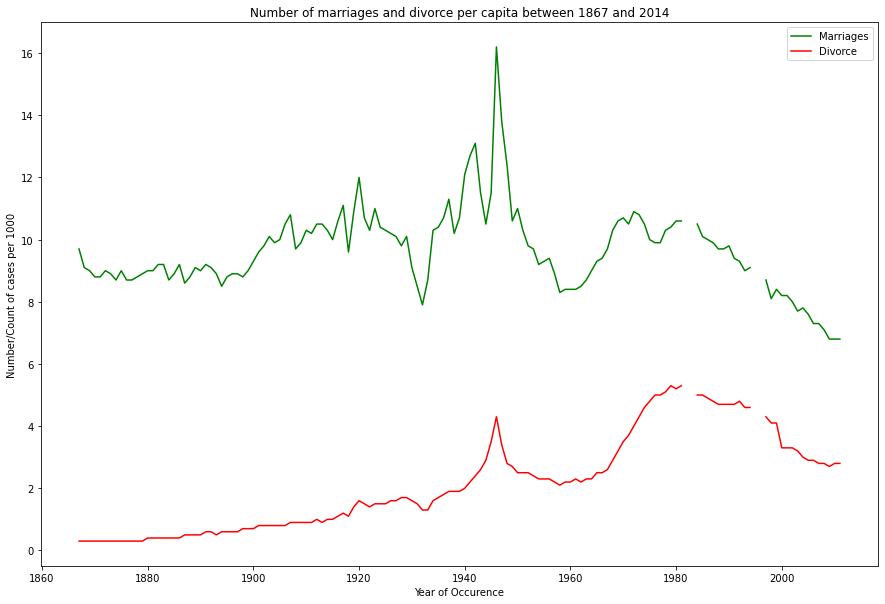

In [114]:
us = pd.read_csv('us-marriages-divorces-1867-2014.csv')

year = us['Year'].values
marriagesp1000=us['Marriages_per_1000'].values
divorcep1000=us['Divorces_per_1000'].values

plt.figure(figsize=(15,10))
plt.plot(year,marriagesp1000,color='green',label="Marriages")
plt.plot(year,divorcep1000,color='red',label="Divorce")

plt.xlabel("Year of Occurence")
plt.ylabel("Number/Count of cases per 1000")

plt.title("Number of marriages and divorce per capita between 1867 and 2014")
plt.legend()
plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per   
capita in the U.S. between 1900, 1950, and 2000.  
Don't forget to label your axes!  

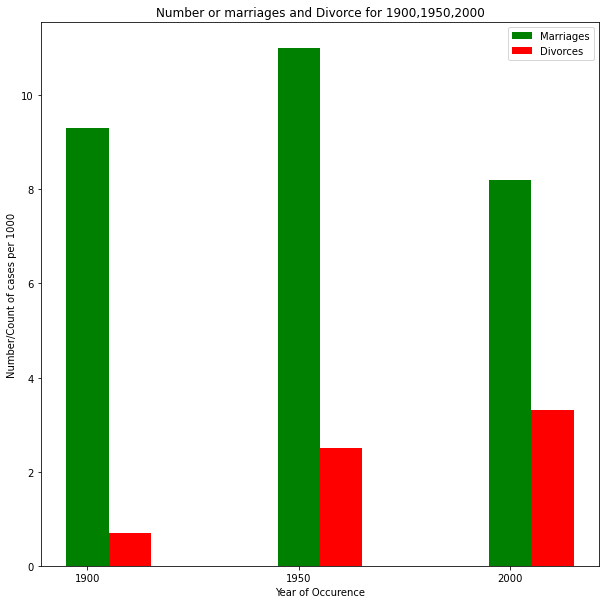

In [112]:
us_md=pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_hcent=us_md.loc[us_md["Year"] == 1900  ].append(us_md.loc[us_md["Year"] == 1950  ].append(us_md.loc[us_md["Year"] == 2000]))

plt.figure(figsize=(10,10))
plt.bar(us_hcent['Year'],us_hcent['Marriages_per_1000'],width=10,tick_label=[1900,1950,2000],label="Marriages",color="green")
plt.bar(us_hcent['Year']+10,us_hcent['Divorces_per_1000'],width=10,label="Divorces",color="red")

plt.legend()

plt.xlabel("Year of Occurence")
plt.ylabel("Number/Count of cases per 1000")

plt.title("Number or marriages and Divorce for 1900,1950,2000")

plt.show()

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort   
the actors by their kill count and label each bar with the corresponding actor's name.  
Don't forget to label your axes!    

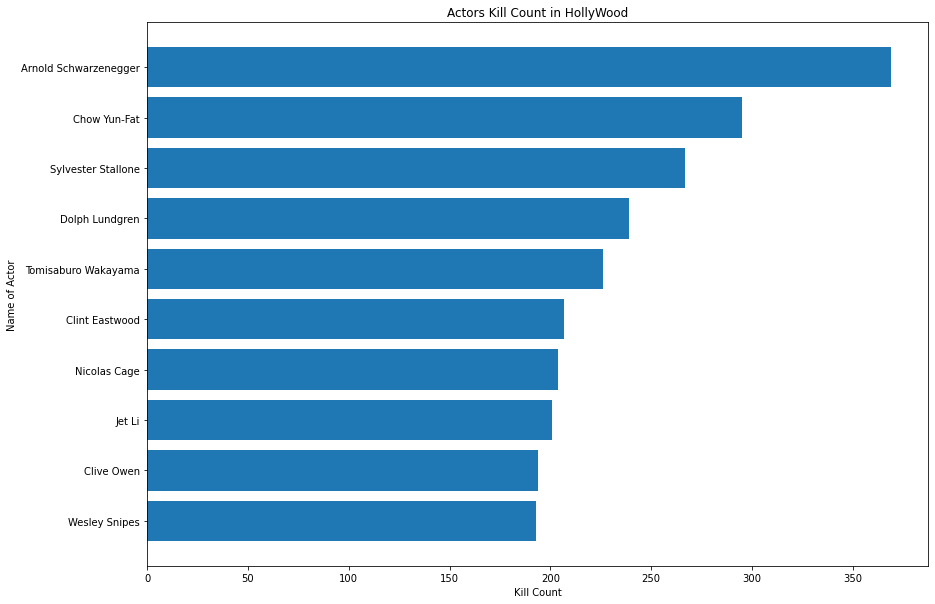

In [117]:
actors =pd.read_csv('actor_kill_counts.csv')
actorsByCount=actors.sort_values('Count')

plt.figure(figsize=(14,10))
plt.barh(actorsByCount['Actor'],actorsByCount['Count'])

plt.xlabel("Kill Count")
plt.ylabel("Name of Actor")

plt.title("Actors Kill Count in HollyWood")

 
plt.show()


# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were   
assassinated.  
Make sure that the pie chart is an even circle, labels the categories, and shows the   
percentage breakdown of the categories.  

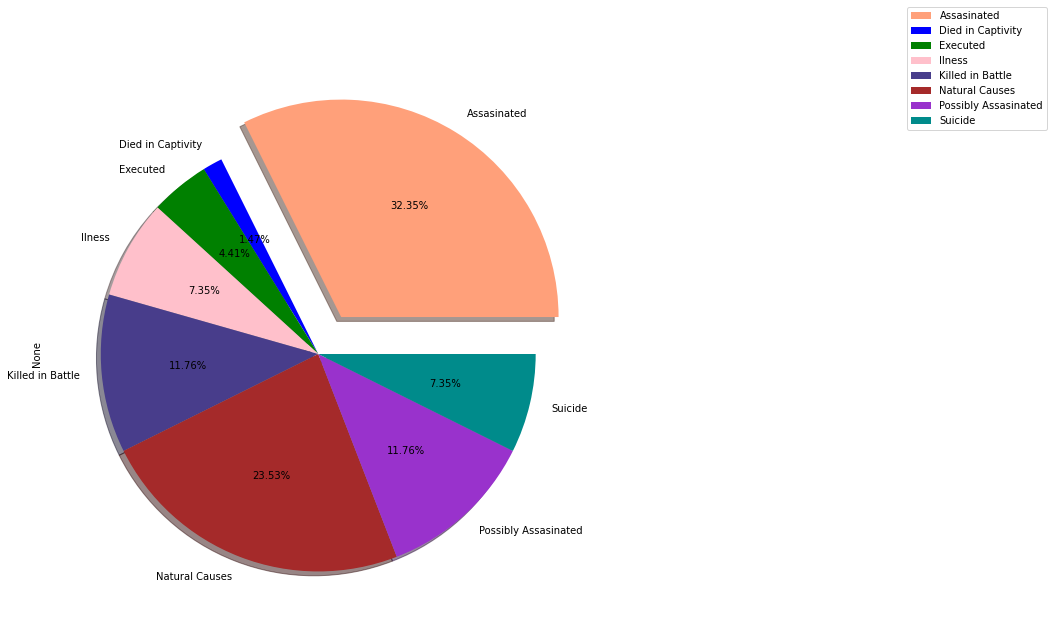

In [76]:
deathCauses =pd.read_csv('roman-emperor-reigns.csv')
deathCauses
Reasons = deathCauses.groupby(['Cause_of_Death']).size()
c=["lightsalmon", "blue" ,"green", "pink","darkslateblue", "brown", "darkorchid", "darkcyan"]
explodededPiece=[0.2,0,0,0,0,0,0,0]
labelList = ['Assasinated','Died in Captivity','Executed','Ilness','Killed in Battle','Natural Causes','Possibly Assasinated','Suicide']
plt.figure(figsize=(14,10))
Reasons.plot.pie(autopct='%1.2f%%',labels=labelList,  colors=c,explode=explodededPiece,shadow=True);
plt.legend(loc='center right',bbox_to_anchor=(1.85,1.025))
plt.show()
#referenced w3schools.com  https://www.w3schools.com/python/matplotlib_pie_charts.asp for color and explode, shadow attributes
# referenced stackoverflow for legend repositioning it was overlappping with the chart label
#https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by   
arcades and the number of Computer Science PhDs awarded in the U.S. between   
2000 and 2009.  
Don't forget to label your axes!  
Color each dot according to its year  

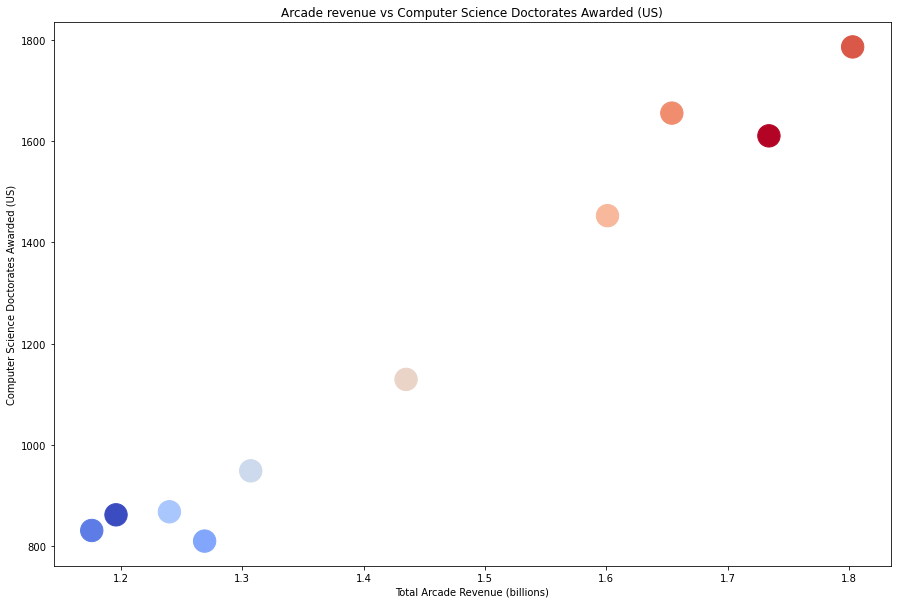

In [221]:
revenue =pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
revenue
#plt.scatter(revenue["Year"],revenue["Total Arcade Revenue (billions)"])
#annotations=[revenue["Year"]]
#X=revenue["Total Arcade Revenue (billions)"]
#Y=revenue["Computer Science Doctorates Awarded (US)"]

arrCol=[10,20,30,40,50,60,70,80,90,100]
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(revenue["Total Arcade Revenue (billions)"],revenue["Computer Science Doctorates Awarded (US)"],c=arrCol,cmap="coolwarm",s=500)

#for i, yr in enumerate(annotations):
 #   plt.annotate(yr, (X[i],Y[i]))

#plt.colorbar(label="con")

plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")


plt.title("Arcade revenue vs Computer Science Doctorates Awarded (US)")
plt.show()